In [13]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

from mrcnn.utils import Dataset
from matplotlib import pyplot as plt

from mrcnn.config import Config
from mrcnn.model import MaskRCNN


from mrcnn import model as modellib, utils

In [ ]:
# class CustomDataset(utils.Dataset):

#     # Define a dictionary to map class names to class IDs
#     class_names_to_ids = {"Topi": 1, "Pakaian": 2, "Meja": 3, "Cangkir": 4}  # Add more classes as needed

#     def add_custom_classes(self):
#         """Add custom classes to the dataset."""
#         for class_name, class_id in self.class_names_to_ids.items():
#             self.add_class("custom", class_id, class_name)

#     def load_custom(self, dataset_dir, subset):
#         """Load a subset of the custom dataset.
#         dataset_dir: Root directory of the dataset.
#         subset: Subset to load: train or val
#         """
#         # Add custom classes
#         self.add_custom_classes()

#         # Train or validation dataset?
#         assert subset in ["train", "val"]
#         dataset_dir = os.path.join(dataset_dir, subset)

#         # Load annotations
#         annotations = json.load(open(os.path.join(dataset_dir, "C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset/train/labels/labels_train_VGG.json")))
#         annotations = list(annotations.values())  # don't need the dict keys

#         # The VIA tool saves images in the JSON even if they don't have any
#         # annotations. Skip unannotated images.
#         annotations = [a for a in annotations if a['regions']]

#         # Add images
#         for a in annotations:
#             polygons = [r['shape_attributes'] for r in a['regions'].values()]

#             custom = [s['region_attributes'] for s in a['regions'].values()]
#             num_ids = []
#             # Add the classes according to the requirement
#             for n in custom:
#                 try:
#                     num_ids.append(self.class_names_to_ids[n['label']])
#                 except:
#                     pass

#             # load_mask() needs the image size to convert polygons to masks.
#             image_path = os.path.join(dataset_dir, a['filename'])
#             image = skimage.io.imread(image_path)
#             height, width = image.shape[:2]

#             self.add_image(
#                 "custom",
#                 image_id=a['filename'],  # use file name as a unique image id
#                 path=image_path,
#                 width=width, height=height,
#                 polygons=polygons,
#                 num_ids=num_ids)
            
#     def load_mask(self, image_id):
#         """Generate instance masks for an image.
#        Returns:
#         masks: A bool array of shape [height, width, instance count] with
#             one mask per instance.
#         class_ids: a 1D array of class IDs of the instance masks.
#         """
#         # If not a custom dataset image, delegate to parent class.
#         image_info = self.image_info[image_id]
#         if image_info["source"] != "custom":
#             return super(self.__class__, self).load_mask(image_id)
#         num_ids = image_info['num_ids']	
#         #print("Here is the numID",num_ids)

#         # Convert polygons to a bitmap mask of shape
#         # [height, width, instance_count]
#         info = self.image_info[image_id]
#         mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
#                         dtype=np.uint8)
#         for i, p in enumerate(info["polygons"]):
#             # Get indexes of pixels inside the polygon and set them to 1
#             rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
#             mask[rr, cc, i] = 1

#         # Return mask, and array of class IDs of each instance. Since we have
#         # one class ID only, we return an array of 1s
#         num_ids = np.array(num_ids, dtype=np.int32)	
#         return mask, num_ids#.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32), 

#     def image_reference(self, image_id):
#         """Return the path of the image."""
#         info = self.image_info[image_id]
#         if info["source"] == "custom":
#             return info["path"]
#         else:
#             super(self.__class__, self).image_reference(image_id)

In [14]:
class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """Load a subset of the custom dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes according to the number of classes required to detect
        self.add_class("custom", 1, "Topi")
        self.add_class("custom", 2, "Meja")
        self.add_class("custom", 3, "Pakaian")
        self.add_class("custom", 4, "Cangkir")
        # Add more classes as needed...

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        annotations = json.load(open(os.path.join(dataset_dir, "C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset/train/labels/labels_train_VGG.json")))
        annotations = list(annotations.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]

        # Add images
        for a in annotations:
            polygons = [r['shape_attributes'] for r in a['regions'].values()]

            custom = [s['region_attributes'] for s in a['regions'].values()]
            num_ids = []
            # Add the classes according to the requirement
            for n in custom:
                try:
                    if n['label'] == 'Topi':
                        num_ids.append(1)
                    elif n['label'] == 'Meja':
                        num_ids.append(2)
                    elif n['label'] == 'Pakaian':
                        num_ids.append(3)
                    elif n['label'] == 'Cangkir':
                        num_ids.append(4)
                    # Add more conditions for other classes...
                except:
                    pass

            # load_mask() needs the image size to convert polygons to masks.
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "custom",
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids)
            
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a custom dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "custom":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = image_info['num_ids']	
        #print("Here is the numID",num_ids)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        num_ids = np.array(num_ids, dtype=np.int32)	
        return mask, num_ids#.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32), 

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "custom":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)
            


In [ ]:
# class CustomDataset(utils.Dataset):

#     def load_custom(self, dataset_dir, subset):
#         """Load a subset of the custom dataset.
#         dataset_dir: Root directory of the dataset.
#         subset: Subset to load: train or val
#         """
#         # Add classes according to the numbe of classes required to detect
#         self.add_class("custom", 1, "Topi")
#         self.add_class("custom",2,"Meja")
        

#         # Train or validation dataset?
#         assert subset in ["train", "val"]
#         dataset_dir = os.path.join(dataset_dir, subset)

#         # Load annotations
#         # VGG Image Annotator (up to version 1.6) saves each image in the form:
#         # { 'filename': '28503151_5b5b7ec140_b.jpg',
#         #   'regions': {
#         #       '0': {
#         #           'region_attributes': {},
#         #           'shape_attributes': {
#         #               'all_points_x': [...],
#         #               'all_points_y': [...],
#         #               'name': 'polygon'}},
#         #       ... more regions ...
#         #   },
#         #   'size': 100202
#         # }
#         # We mostly care about the x and y coordinates of each region
#         # Note: In VIA 2.0, regions was changed from a dict to a list.
#         annotations = json.load(open(os.path.join(dataset_dir, "C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset_meja/train/labels/labels_train_VGG.json")))
#         annotations = list(annotations.values())  # don't need the dict keys

#         # The VIA tool saves images in the JSON even if they don't have any
#         # annotations. Skip unannotated images.
#         annotations = [a for a in annotations if a['regions']]

#         # Add images
#         for a in annotations:
#             # Get the x, y coordinaets of points of the polygons that make up
#             # the outline of each object instance. These are stores in the
#             # shape_attributes (see json format above)
#             # The if condition is needed to support VIA versions 1.x and 2.x.
#             polygons = [r['shape_attributes'] for r in a['regions'].values()]
#             #labelling each class in the given image to a number

#             custom = [s['region_attributes'] for s in a['regions'].values()]
            
#             num_ids=[]
#             #Add the classes according to the requirement
#             for n in custom:
#                 try:
#                     if n['label']=='Topi':
#                         num_ids.append(1)
#                     elif n['label']=='Meja':
#                         num_ids.append(2)
#                 except:
#                     pass

#             # load_mask() needs the image size to convert polygons to masks.
#             # Unfortunately, VIA doesn't include it in JSON, so we must read
#             # the image. This is only managable since the dataset is tiny.
#             image_path = os.path.join(dataset_dir, a['filename'])
#             image = skimage.io.imread(image_path)
#             height, width = image.shape[:2]

#             self.add_image(
#                 "custom",
#                 image_id=a['filename'],  # use file name as a unique image id
#                 path=image_path,
#                 width=width, height=height,
#                 polygons=polygons,
#                 num_ids=num_ids)

#     def load_mask(self, image_id):
#         """Generate instance masks for an image.
#        Returns:
#         masks: A bool array of shape [height, width, instance count] with
#             one mask per instance.
#         class_ids: a 1D array of class IDs of the instance masks.
#         """
#         # If not a custom dataset image, delegate to parent class.
#         image_info = self.image_info[image_id]
#         if image_info["source"] != "custom":
#             return super(self.__class__, self).load_mask(image_id)
#         num_ids = image_info['num_ids']	
#         #print("Here is the numID",num_ids)

#         # Convert polygons to a bitmap mask of shape
#         # [height, width, instance_count]
#         info = self.image_info[image_id]
#         mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
#                         dtype=np.uint8)
#         for i, p in enumerate(info["polygons"]):
#             # Get indexes of pixels inside the polygon and set them to 1
#             rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
#             mask[rr, cc, i] = 1

#         # Return mask, and array of class IDs of each instance. Since we have
#         # one class ID only, we return an array of 1s
#         num_ids = np.array(num_ids, dtype=np.int32)	
#         return mask, num_ids#.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32), 

#     def image_reference(self, image_id):
#         """Return the path of the image."""
#         info = self.image_info[image_id]
#         if info["source"] == "custom":
#             return info["path"]
#         else:
#             super(self.__class__, self).image_reference(image_id)

In [16]:
dataset_train = CustomDataset()
dataset_train.load_custom("C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset", "train") 
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))



# define image id
image_id = 39
# load the image
image = dataset_train.load_image(image_id)
# load the masks and the class ids
mask, class_ids = dataset_train.load_mask(image_id)

Train: 102


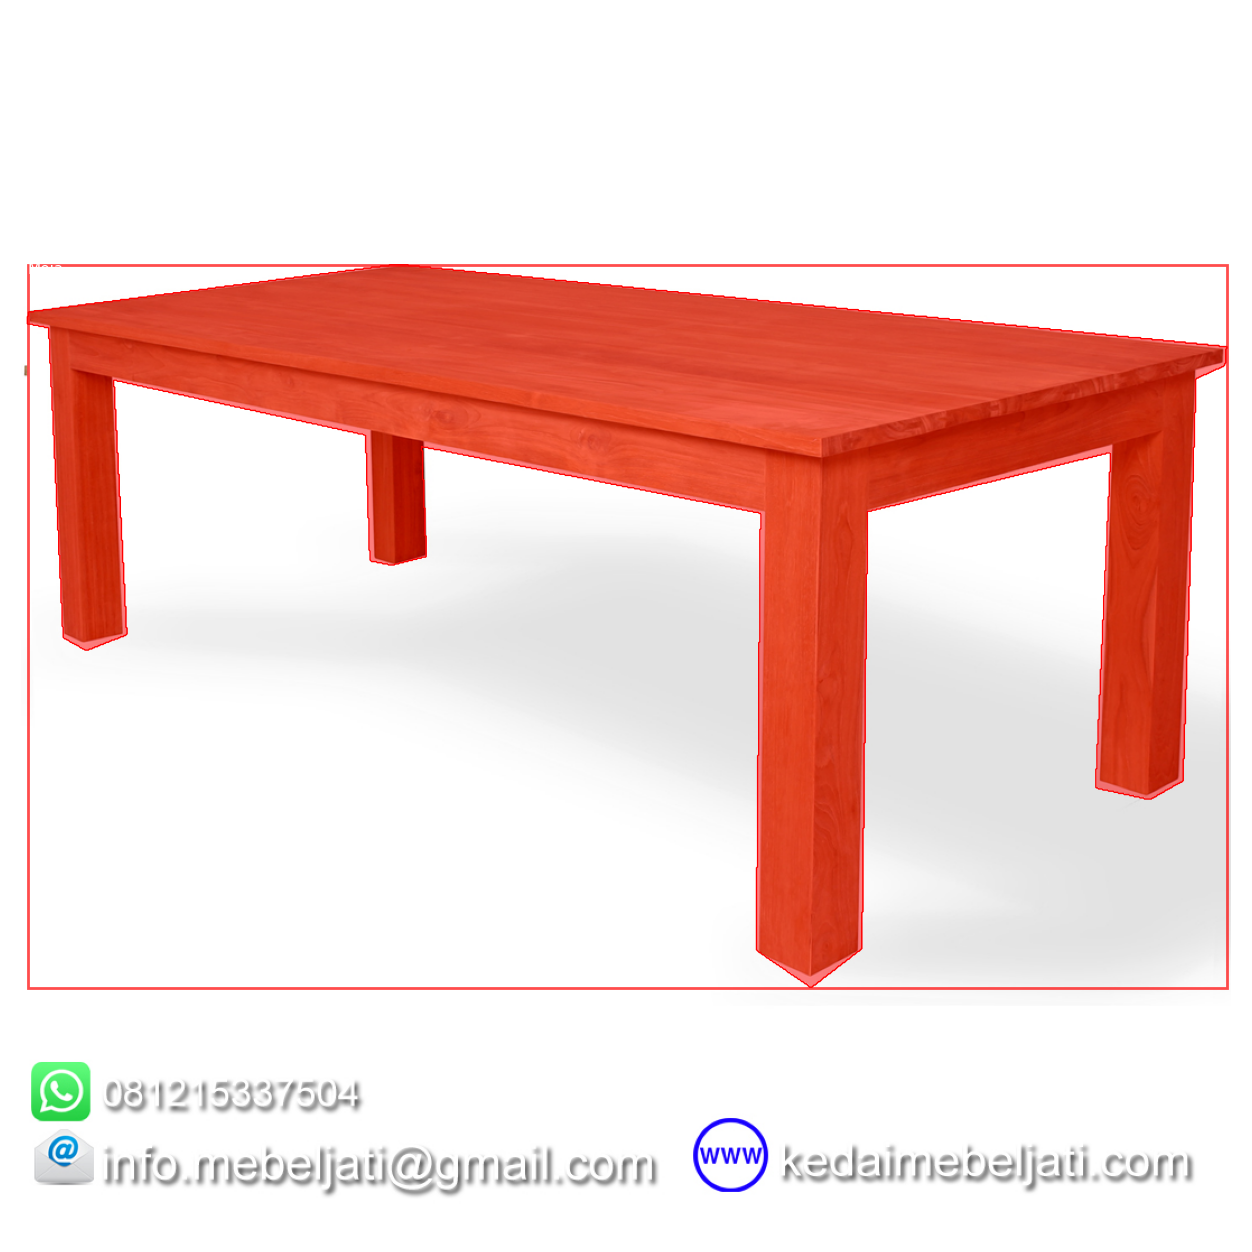


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [17]:
# display_instances(image, r1['rois'], r1['masks'], r1['class_ids'],
# dataset.class_names, r1['scores'], ax=ax, title="Predictions1")

# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, dataset_train.class_names)


# define a configuration for the model
class ModelConfig(Config):
	# define the name of the configuration
	NAME = "model_cfg"
	# number of classes (background + blue marble + non-Blue marble)
	NUM_CLASSES = 1 + 4
	# number of training steps per epoch
	STEPS_PER_EPOCH = 100
    #DETECTION_MIN_CONFIDENCE = 0.9 # Skip detections with < 90% confidence
# prepare config
config = ModelConfig()
config.display() 

In [5]:
ROOT_DIR = os.path.abspath("./")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
# Directory to save logs and trained model
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")
# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/coco_weights/mask_rcnn_coco.h5")

In [6]:
########################
#Weights are saved to root D: directory. need to investigate how they can be
#saved to the directory defined... "logs_models"

###############

# define the model
model = MaskRCNN(mode='training', model_dir=DEFAULT_LOGS_DIR, config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')
model.train(dataset_train, dataset_train, learning_rate=config.LEARNING_RATE, epochs=25, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /logdir/train\mask_rcnn_model_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)

C:\Users\judit\anaconda3\envs\maskrcnn_2\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/25


ERROR:root:Error processing image {'id': '39.jpg', 'source': 'custom', 'path': 'C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset\\train\\39.jpg', 'width': 1000, 'height': 667, 'polygons': [{'name': 'polygon', 'all_points_x': [534.9025974025974, 499.18831168831167, 465.0974025974026, 427.7597402597403, 435.06493506493507, 431.0064935064935, 429.3831168831169, 467.53246753246754, 527.5974025974026, 587.6623376623377, 613.6363636363636, 641.2337662337662, 658.2792207792207, 658.2792207792207, 663.1493506493506, 668.8311688311688, 666.3961038961039, 642.0454545454545, 603.0844155844155, 571.4285714285714, 547.8896103896104, 530.8441558441558, 534.9025974025974], 'all_points_y': [82.6883116883117, 102.16883116883118, 126.51948051948052, 152.49350649350652, 167.91558441558442, 176.03246753246754, 184.96103896103898, 183.33766233766235, 190.64285714285714, 183.33766233766235, 192.26623376623377, 209.31168831168833, 212.55844155844156, 199.57142857142858, 177.65584415584416, 149.24675324675

  9/100 [=>............................] - ETA: 1:26:16 - loss: 4.3975

KeyboardInterrupt: 